In [216]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [217]:
sp500=yf.download('^GSPC',start="2007-02-01", end="2023-02-01",interval='1wk')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

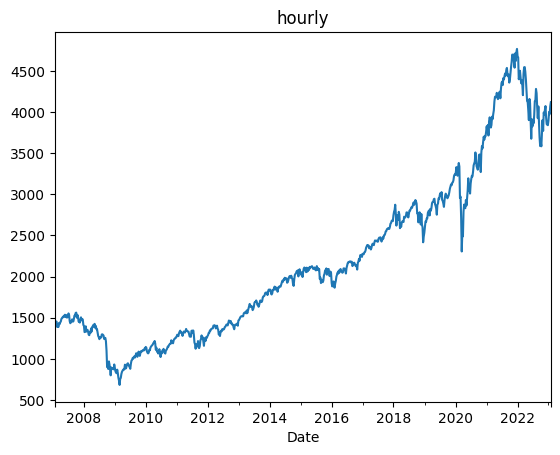

In [218]:
sp500['Adj Close'].plot( title='hourly')

In [219]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-29,1437.900024,1449.329956,1437.900024,1448.390015,1448.390015,5484340000
2007-02-05,1448.329956,1452.989990,1433.439941,1438.060059,1438.060059,13434950000
2007-02-12,1438.000000,1457.969971,1431.439941,1455.540039,1455.540039,12637490000
2007-02-19,1455.530029,1461.569946,1448.359985,1451.189941,1451.189941,9475560000
2007-02-26,1451.040039,1456.949951,1380.869995,1387.170044,1387.170044,17999820000


In [220]:
# dicket fuller test sp500

In [221]:
adf_sp500, pvalue_sp500, usedlag_, nobs_, critical_values_sp500, icbest_ = adfuller(sp500['Adj Close'])
adf_sp500

0.16544856801952013

In [222]:
pvalue_sp500 # failed

0.9702557516686494

In [223]:
critical_values_sp500

{'1%': -3.43821515743291, '5%': -2.8650117437698652, '10%': -2.568618642812369}

In [224]:
# decomposition into trend, seasonal and residual

In [225]:
from statsmodels.tsa.seasonal import seasonal_decompose
sp500_decomposition = seasonal_decompose(x=sp500['Adj Close'], model='additive', period=3)

In [226]:
sp500_trend = sp500_decomposition.trend
sp500_seasonal = sp500_decomposition.seasonal
sp500_residual = sp500_decomposition.resid

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

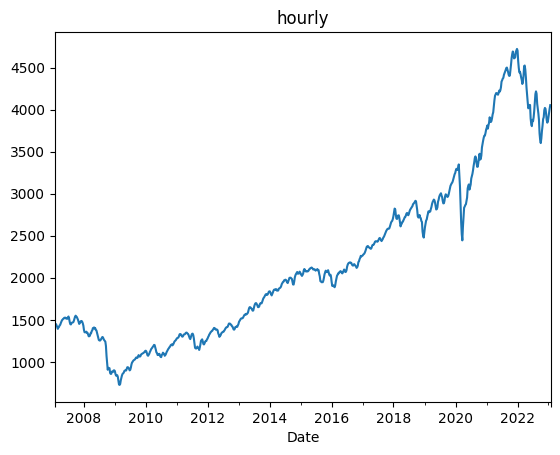

In [227]:
sp500_trend.plot( title='hourly')

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

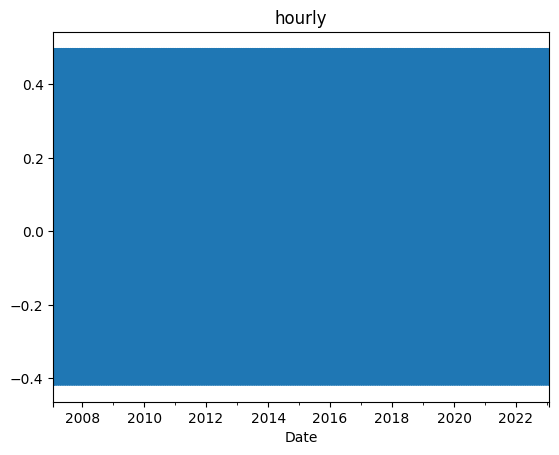

In [228]:
sp500_seasonal.plot( title='hourly')

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

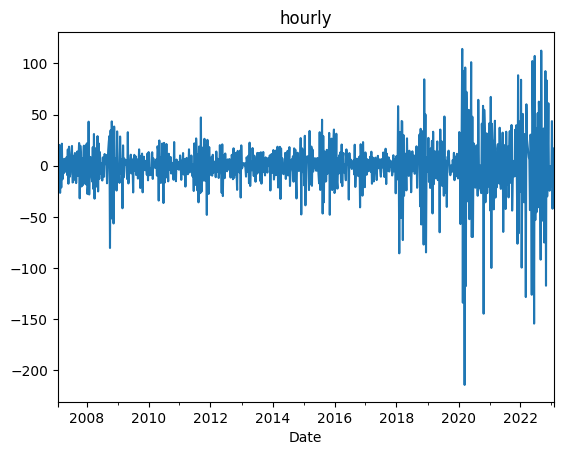

In [229]:
sp500_residual.plot( title='hourly')

In [230]:
# dickey fuller of residual
sp500_residual=sp500_residual[~np.isnan(sp500_residual)]

In [231]:
adf_sp500_residual, pvalue_sp500_residual, usedlag_, nobs_, critical_values_sp500_residual, icbest_ = adfuller(sp500_residual)
adf_sp500_residual

-12.124336895641333

In [232]:
pvalue_sp500_residual # test passed

1.795089856263969e-22

In [233]:
critical_values_sp500_residual

{'1%': -3.4384189633001956, '5%': -2.86510158480911, '10%': -2.568666500743605}

In [234]:
# variance and mean test
sp500_residual.shape

(834,)

In [235]:
chunks_sp500_residual = np.split(sp500_residual, indices_or_sections=6)

In [236]:
np.mean(chunks_sp500_residual, axis=1)

array([-0.13519184, -0.00678269, -0.02783348,  0.07372901, -0.29049956,
        0.24514004])

In [237]:
np.var(chunks_sp500_residual, axis=1)

array([ 359.89790011,  221.86113754,  167.63763657,  261.47949677,
       1558.56999035, 2402.90132084])

In [238]:
# histogram

<AxesSubplot:>

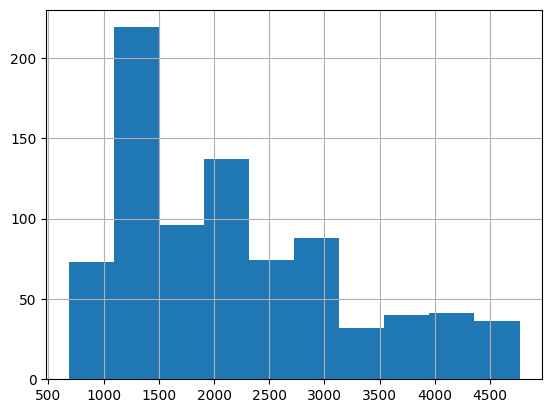

In [239]:
sp500['Adj Close'].hist() # no normal dist

In [240]:
# log transform

In [241]:
sp500_log = np.log(sp500['Adj Close'])

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

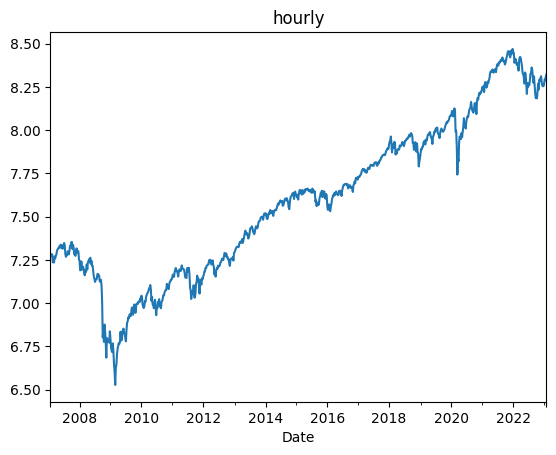

In [242]:
sp500_log.plot( title='hourly')

In [243]:
adf_sp500_log, pvalue_sp500_log, usedlag_, nobs_, critical_values_sp500_log, icbest_ = adfuller(sp500_log)
adf_sp500_log

-0.09828998382772879

In [244]:
pvalue_sp500_log

0.9496085915865863

In [245]:
critical_values_sp500_log

{'1%': -3.43821515743291, '5%': -2.8650117437698652, '10%': -2.568618642812369}

In [246]:
# difference

In [247]:
sp500_diff=sp500['Adj Close'].diff(periods=1)[~np.isnan(sp500['Adj Close'].diff(periods=1))]

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

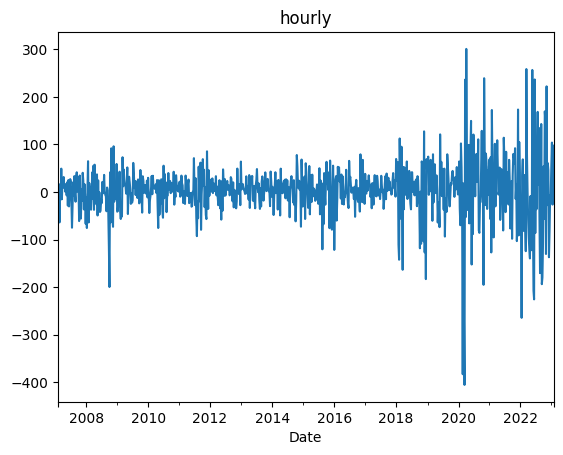

In [248]:
sp500_diff.plot( title='hourly')

In [249]:
# variance, mean test
sp500_diff

Date
2007-02-05    -10.329956
2007-02-12     17.479980
2007-02-19     -4.350098
2007-02-26    -64.019897
2007-03-05     15.669922
                 ...    
2023-01-02     55.580078
2023-01-09    104.010010
2023-01-16    -26.479980
2023-01-23     97.949951
2023-01-30     48.649902
Name: Adj Close, Length: 835, dtype: float64

In [250]:
sp500_diff.shape

(835,)

In [252]:
chunks_sp500_diff = np.split(sp500_diff, indices_or_sections=5) # for week data change it to 13
np.mean(chunks_sp500_diff,axis=1)

array([-1.53449108,  2.47994027,  3.12293431,  5.88311366,  6.04143666])

In [253]:
np.var(chunks_sp500_diff,axis=1)

array([ 1377.18031188,   836.4851803 ,  1113.8159009 ,  2230.45920631,
       11942.25296124])

In [254]:
# adf test

In [255]:
adf_sp500_diff, pvalue_sp500_diff, usedlag_, nobs_, critical_values_sp500_diff, icbest_ = adfuller(sp500_diff)
adf_sp500_diff

-30.69861373432765

In [256]:
pvalue_sp500_diff # pass

0.0